In [1]:
# 필요한 라이브러리 임포트
from sklearn.datasets import load_wine
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
# 1. wine 데이터셋 불러오기
wine = load_wine()

In [6]:
# 데이터셋을 DataFrame으로 변환
wine_df = pd.DataFrame(wine.data, columns=wine.feature_names)

In [7]:
# 2. 데이터 전처리
# 특성 스케일링 (평균 0, 분산 1로 표준화)
scaler = StandardScaler()
wine_scaled = scaler.fit_transform(wine_df)

In [8]:
# 3. K-means 클러스터링 수행
# 클러스터 수 설정
k = 3

In [9]:
# KMeans 객체 생성 및 모델 학습
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(wine_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [10]:
# 클러스터링 결과 (각 데이터 포인트의 클러스터 레이블) 얻기
labels = kmeans.labels_


In [11]:
# 클러스터 중심점 좌표 얻기
centroids = kmeans.cluster_centers_

In [12]:
# 4. 클러스터링 결과 시각화
# PCA를 사용하여 데이터를 2차원으로 차원 축소 (시각화를 위해)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
wine_pca = pca.fit_transform(wine_scaled)

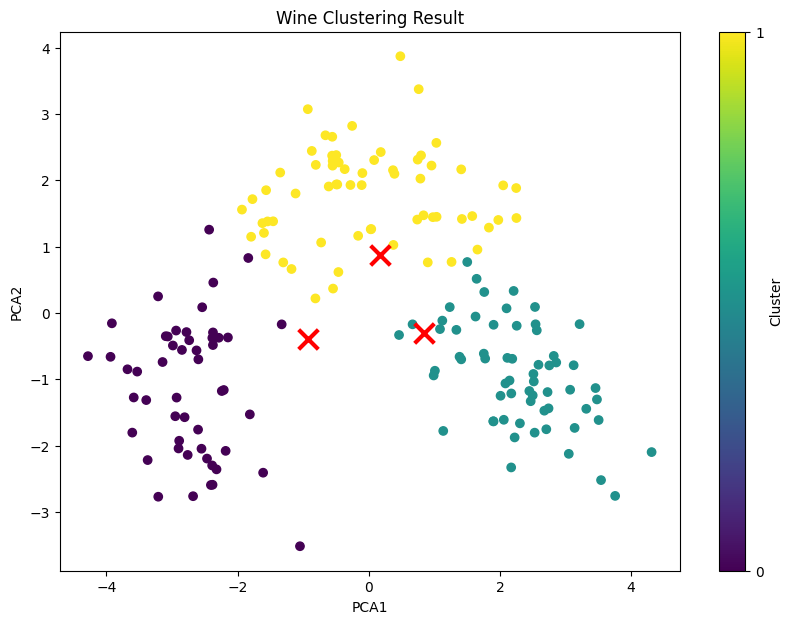

In [13]:
# 클러스터링 결과를 2차원 공간에 시각화
plt.figure(figsize=(10, 7))
plt.scatter(wine_pca[:, 0], wine_pca[:, 1], c=labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, linewidths=3, color='r')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Wine Clustering Result')
plt.colorbar(ticks=range(k), label='Cluster')
plt.show()